In [1]:
#Import the module and other libraries
import line_detection_updated as ld
import image_rotation as ir
import satmetrics

from astropy.io import fits
import astropy.visualization as aviz

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

In [3]:
#Set filepaths
current_user_filepath = 'Data'
img1 = current_user_filepath + '/calexp-0941420_07.fits'
img2 = current_user_filepath + '/calexp-0941422_33.fits'
img3 = current_user_filepath + '/calexp-0941424_34.fits'
img4 = current_user_filepath + '/calexp-0941426_16.fits'
img5 = current_user_filepath + '/calexp-0941424_37.fits'
img6 = current_user_filepath + '/STARLINK-1892-20220305200929.fits'
img7 = current_user_filepath + '/STARLINK-1892-N-20220305200959.fits'
img8 = current_user_filepath + '/STARLINK-1905-20220305191929.fits'
img_multiple_streaks = current_user_filepath + '/bi327715.fits'





In [4]:
#What is the working image?

current_image_filepath = img1
image_dict = satmetrics.file_ingest(current_image_filepath)
working_image = image_dict['image_list'][0] #Each fits file can have multiple science images. 


08/11/2022 03:43:03 PM Number of detected lines = 2


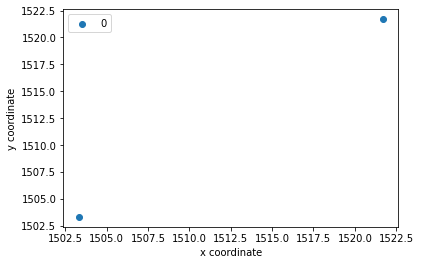

In [5]:
#Get the Hough transformation results
detector = ld.LineDetection(image=working_image.data)
results_ht = detector.hough_transformation()
clustered_lines = ld.cluster(results_ht["Cartesian Coordinates"], results_ht["Lines"], plot_image=True)

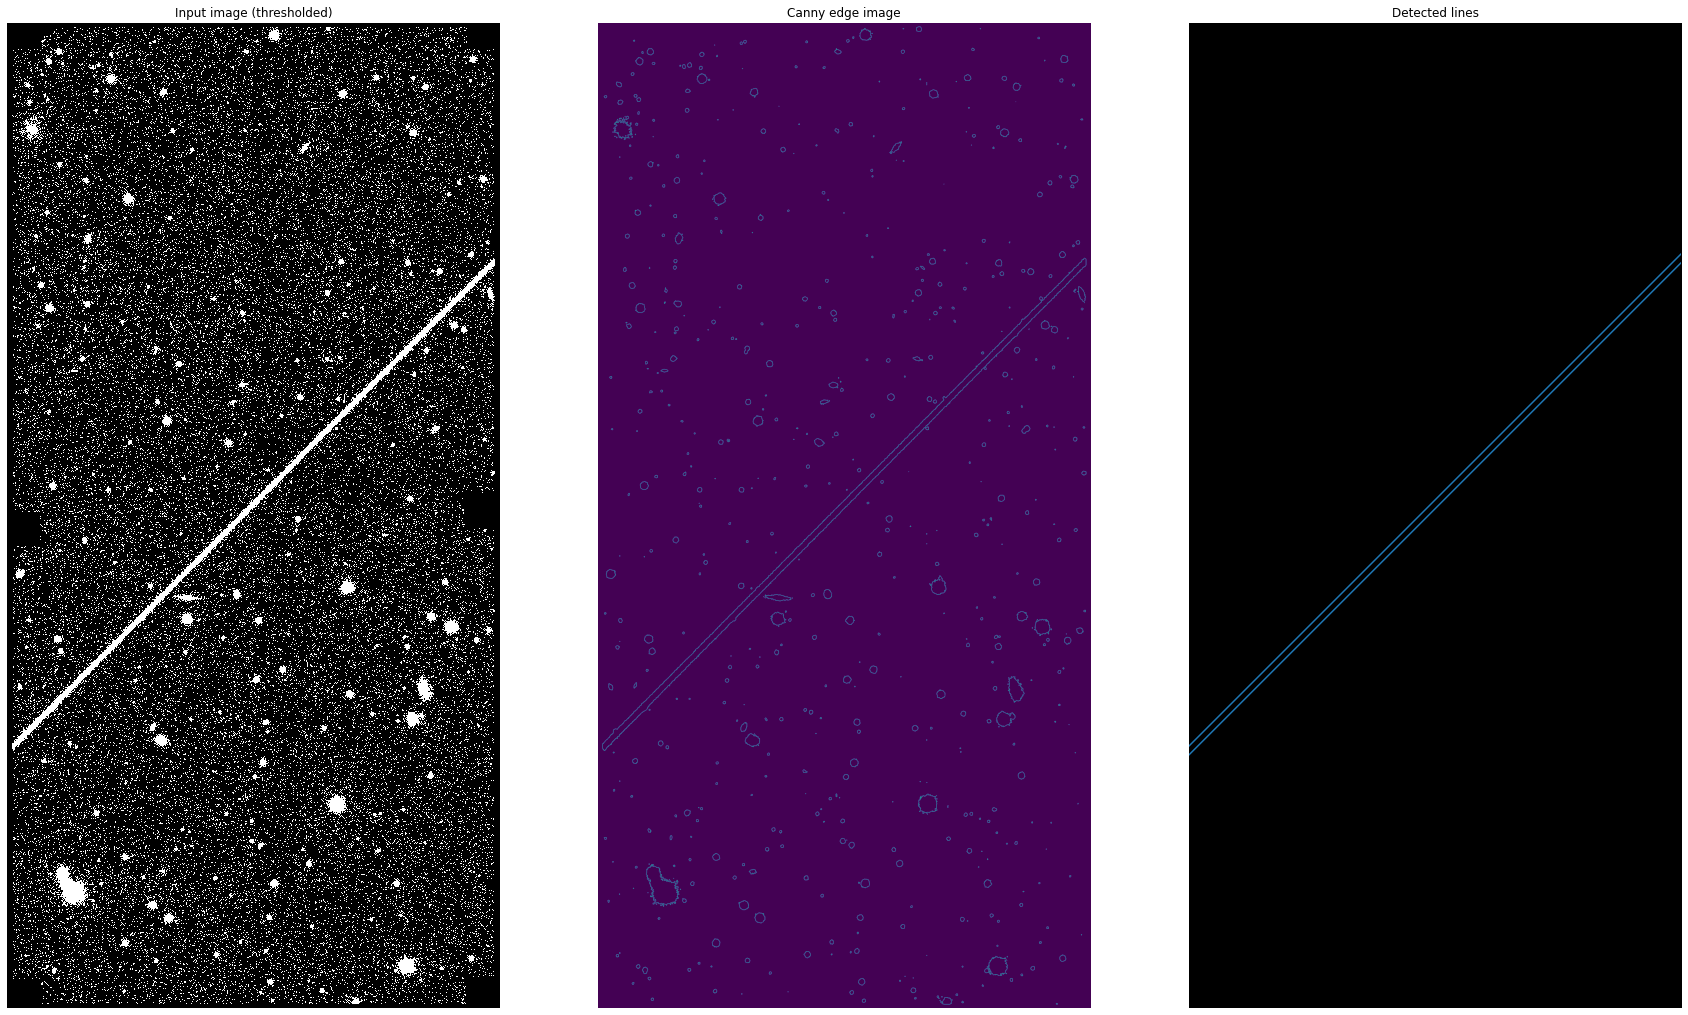

In [6]:
#Plots of line detection
fig, axes = plt.subplots(1, 3, figsize=(30, 30))
ax = axes.ravel()

ld.show(results_ht['Thresholded Image'], cmap="gray", ax=ax[0], interpolation="none")
ax[0].set_title('Input image (thresholded)')
ax[0].set_axis_off()

ld.show(results_ht["Edges"], ax=ax[1])
ax[1].set_title('Canny edge image')
ax[1].set_axis_off()

#Detected lines
blank_image = np.zeros(detector.image.shape)

ld.show(blank_image, cmap="gray", ax=ax[2])

ax[2].set_axis_off()
ax[2].set_title('Detected lines')

cart_coords = results_ht['Cartesian Coordinates']
angles = results_ht['Angles']
for i in range(len(cart_coords)):
    ax[2].axline(cart_coords[i], slope=np.tan(angles[i] + np.pi/2))


<AxesSubplot:>

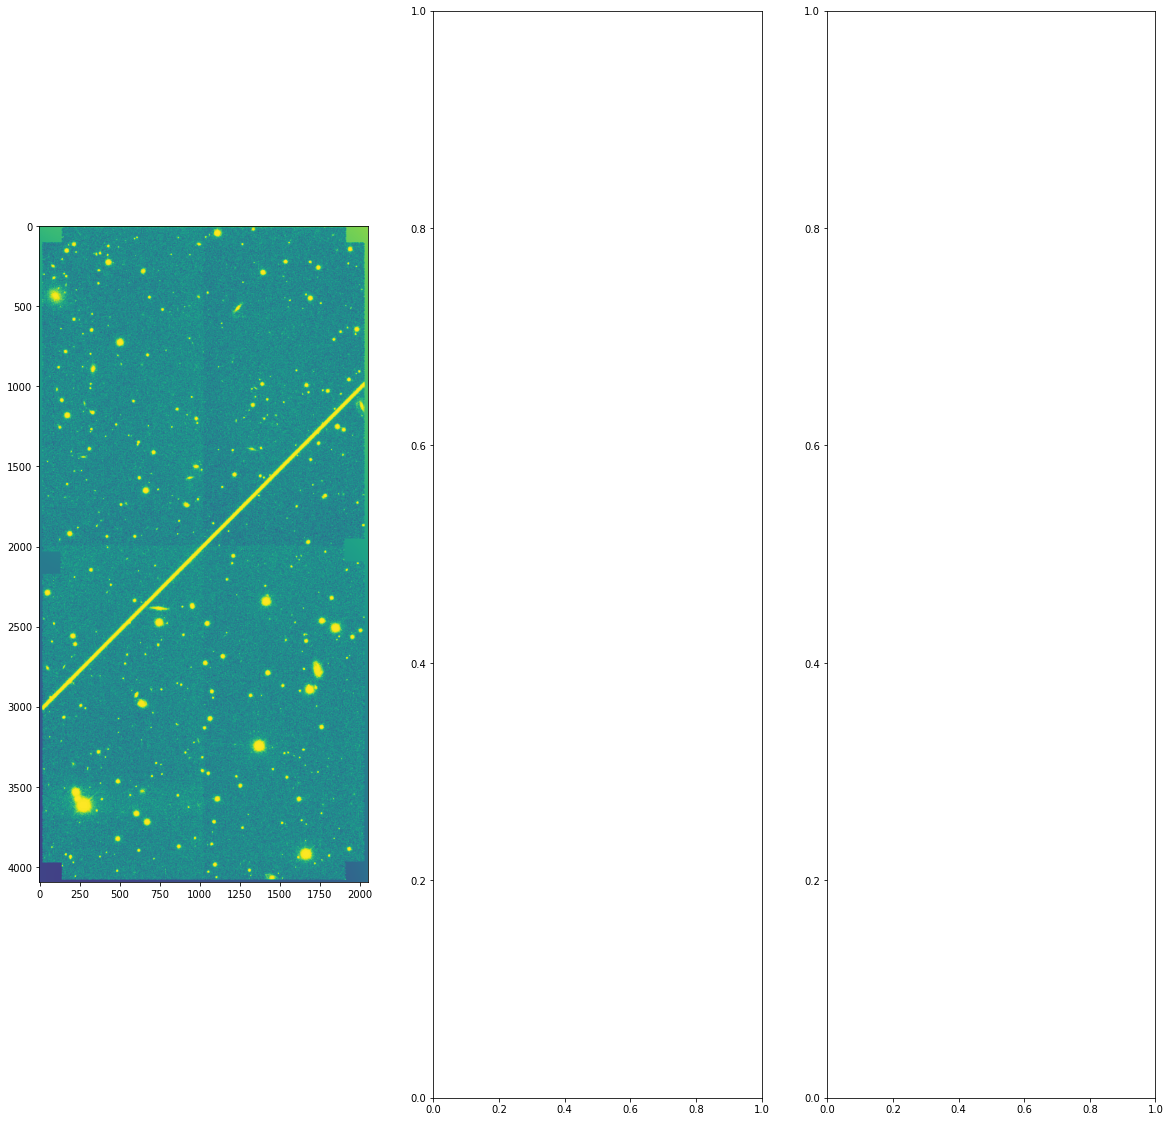

In [10]:
#Visualize raw image
#Visualize raw image
import astropy.visualization as aviz

stretch = aviz.HistEqStretch(detector.image)
norm = aviz.ImageNormalize(detector.image, stretch=stretch, clip=True)
histeq = norm(detector.image)

fig, axes = plt.subplots(1, 3, figsize=(20, 20))
ld.show(histeq, ax=axes[0])

<AxesSubplot:>

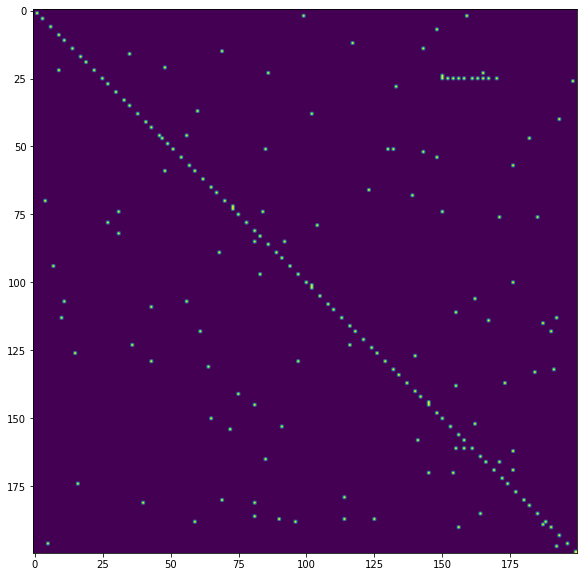

In [29]:
#Plot to demonstrate the voting method of Hough Transform
import numpy as np
test_img = np.zeros((200,200))

for i in np.linspace(1,199,75,dtype='int'):
    test_img[i,i] = 255

for i in np.linspace(150,170,10, dtype='int'):
    test_img[25,i] = 255

#Introduce noise
x = list(np.random.randint(0, high=199, size=(100,), dtype=int))
y = list(np.random.randint(0, high=199, size=(100,), dtype=int))

for x, y in zip(x,y):
    test_img[x,y] = 255

fig, axes = plt.subplots(figsize=(10, 10))
ld.show(test_img, ax=axes)


In [27]:
x = list(np.random.randint(0, high=199, size=(200,), dtype=int))
x


[38,
 92,
 113,
 10,
 61,
 99,
 196,
 141,
 59,
 5,
 173,
 46,
 71,
 94,
 7,
 185,
 162,
 161,
 194,
 31,
 19,
 132,
 139,
 8,
 80,
 77,
 128,
 50,
 172,
 50,
 132,
 52,
 185,
 93,
 3,
 171,
 99,
 174,
 191,
 92,
 163,
 40,
 121,
 35,
 34,
 107,
 148,
 97,
 0,
 52,
 38,
 166,
 11,
 174,
 22,
 178,
 162,
 24,
 156,
 37,
 183,
 22,
 36,
 153,
 46,
 45,
 6,
 152,
 126,
 149,
 60,
 108,
 107,
 137,
 82,
 79,
 12,
 147,
 129,
 195,
 196,
 138,
 184,
 32,
 65,
 104,
 19,
 179,
 171,
 13,
 169,
 40,
 126,
 151,
 101,
 65,
 165,
 128,
 164,
 181,
 194,
 90,
 119,
 120,
 91,
 175,
 125,
 133,
 125,
 171,
 84,
 113,
 78,
 99,
 154,
 166,
 180,
 196,
 118,
 39,
 148,
 180,
 124,
 191,
 12,
 140,
 155,
 83,
 108,
 122,
 156,
 187,
 21,
 49,
 75,
 167,
 114,
 143,
 33,
 176,
 20,
 32,
 129,
 189,
 82,
 178,
 192,
 102,
 140,
 169,
 36,
 184,
 198,
 92,
 90,
 186,
 100,
 135,
 58,
 92,
 69,
 122,
 121,
 106,
 155,
 43,
 41,
 116,
 84,
 52,
 42,
 131,
 47,
 137,
 106,
 143,
 90,
 122,
 187,
 125,
 17